In [116]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cross_validation,metrics,model_selection
path='C:/Projects/Hackerearth/Problem 1/'
# path=''

In [97]:
data=pd.read_csv(path+'train.csv')
test_data=pd.read_csv(path+'test.csv')
mappu={'Front':1, 'Left':2, 'Rear':3, 'Right':4}
tain_size=len(data)
tain_size

38485

In [98]:
target=data['SignFacing (Target)'].map(mappu)

In [99]:
data_all=pd.concat([data,test_data])

In [100]:
ccc=pd.get_dummies(data_all['DetectedCamera'],prefix='DetectedCamera')
data_all=pd.concat([data_all,ccc],axis=1)
del data_all['Id']
del data_all['DetectedCamera']
del data_all['SignFacing (Target)']

In [101]:
data_all.head()

,AngleOfSign,SignAspectRatio,SignHeight,SignWidth,DetectedCamera_Front,DetectedCamera_Left,DetectedCamera_Rear,DetectedCamera_Right
0,195,1.02,45,46,0.0,0.0,1.0,0.0
1,203,1.09,54,59,0.0,0.0,1.0,0.0
2,26,0.96,108,104,1.0,0.0,0.0,0.0
3,199,0.81,47,38,0.0,0.0,1.0,0.0
4,208,0.93,58,54,0.0,0.0,1.0,0.0


In [102]:
def horizona(x,y):
    if x > y:
        return 1
    else:
        return 0

In [103]:
data_all['sign_area']=data_all['SignHeight']*data_all['SignWidth']*data_all['SignAspectRatio']
data_all['new_var']=data_all['AngleOfSign']*data_all['SignAspectRatio']
data_all['sign-peri']=data_all['SignHeight']+data_all['SignWidth']
data_all['new_var2']=(data_all['AngleOfSign']*data_all['SignAspectRatio'])**2
data_all['another_var']=data_all[['SignHeight','SignWidth']].apply(lambda x:horizona(*x),axis=1 )



In [104]:
lala=data_all[:tain_size].copy()
lala['target']=target

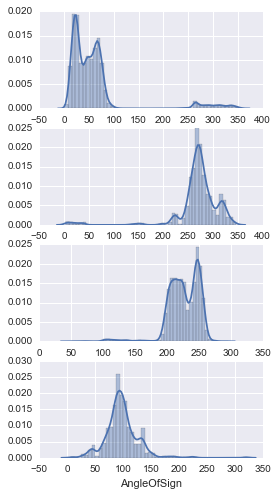

In [105]:
fig, axs = plt.subplots(4,1)
sns.distplot(lala[lala['target']==1]['AngleOfSign'], ax=axs[0])
sns.distplot(lala[lala['target']==2]['AngleOfSign'], ax=axs[1])
sns.distplot(lala[lala['target']==3]['AngleOfSign'], ax=axs[2])
sns.distplot(lala[lala['target']==4]['AngleOfSign'], ax=axs[3])
fig.set_size_inches(4, 8)


In [106]:
pppp=pd.get_dummies(pd.cut(data_all['AngleOfSign'],bins=4))
data_all=pd.concat([data_all,pppp],axis=1)

In [107]:
data_all.columns

Index([u'AngleOfSign', u'SignAspectRatio', u'SignHeight', u'SignWidth',
       u'DetectedCamera_Front', u'DetectedCamera_Left', u'DetectedCamera_Rear',
       u'DetectedCamera_Right', u'sign_area', u'new_var', u'sign-peri',
       u'new_var2', u'another_var', u'(-0.36, 90]', u'(90, 180]',
       u'(180, 270]', u'(270, 360]'],
      dtype='object')

In [108]:
data_all.columns=[ u'AngleOfSign', u'SignAspectRatio', u'SignHeight', u'SignWidth',
       u'DetectedCamera_Front', u'DetectedCamera_Left', u'DetectedCamera_Rear',
       u'DetectedCamera_Right', u'sign_area', u'new_var', u'sign-peri',
       u'new_var2', u'another_var',  'A','B','C','D']

for i in ['sign-peri2','sign_area2','area_ratio2','area_ratio','SignAspectRatio','area_ratio22']:
    del data_all[i]

In [109]:
new_cpy=data_all[:tain_size].copy()
new_cpy['target']=target

In [110]:
new_cpy.corr()['target'].sort_values()

A                      -0.864498
DetectedCamera_Front   -0.539285
SignHeight             -0.451750
sign-peri              -0.448613
SignWidth              -0.412321
DetectedCamera_Right   -0.390254
sign_area              -0.335276
D                      -0.116973
another_var            -0.023962
SignAspectRatio         0.011728
B                       0.197514
DetectedCamera_Left     0.460455
DetectedCamera_Rear     0.547947
new_var2                0.552654
new_var                 0.725031
AngleOfSign             0.764345
C                       0.857945
target                  1.000000
Name: target, dtype: float64

In [111]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(data_all[:tain_size],target,test_size=.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((26939, 17), (11546, 17), (26939L,), (11546L,))

In [137]:
model=xgb.XGBClassifier(gamma=4,max_depth=6,min_child_weight=9)

In [138]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=4, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=9, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [139]:
pred=model.predict_proba(X_test)
100-metrics.log_loss(y_test,pred)

99.897034950887971

In [133]:
parameters = {'gamma':[4],'max_depth':[6],'min_child_weight':[9]}
model2=model_selection.GridSearchCV(model,parameters)

In [134]:
model2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [6], 'gamma': [0, 1, 2, 3, 4], 'min_child_weight': [9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [135]:
model2.best_params_

{'gamma': 4, 'max_depth': 6, 'min_child_weight': 9}

In [136]:
pred2=model2.predict_proba(X_test)
100-metrics.log_loss(y_test,pred2)

99.897034950887971

In [140]:
model.fit(data_all[:tain_size],target)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=4, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=9, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [141]:
pred_final=model.predict_proba(data_all[tain_size:])

In [142]:
sub=pd.DataFrame(pred_final,columns=['Front', 'Left', 'Rear', 'Right'])

In [143]:
sub=pd.concat([test_data['Id'],sub],axis=1)

In [144]:
sub.to_csv(path+'subm12xgb.csv',index=False)